In [2]:
import layoutparser as lp
import layoutparser.ocr as ocr
import matplotlib.pyplot as plt
from matplotlib import figure
import cv2
from pdf2image import convert_from_bytes, convert_from_path
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
import warnings

warnings.filterwarnings("ignore")

In [3]:
ocr_agent = ocr.TesseractAgent()

In [28]:
images = convert_from_bytes(open('Design-Guidelines.pdf', 'rb').read())

In [29]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF44CF2430>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF590AFE50>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB3A60>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB3EB0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB33A0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB3D30>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB3E20>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF47EB3F70>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF44BBDE20>]

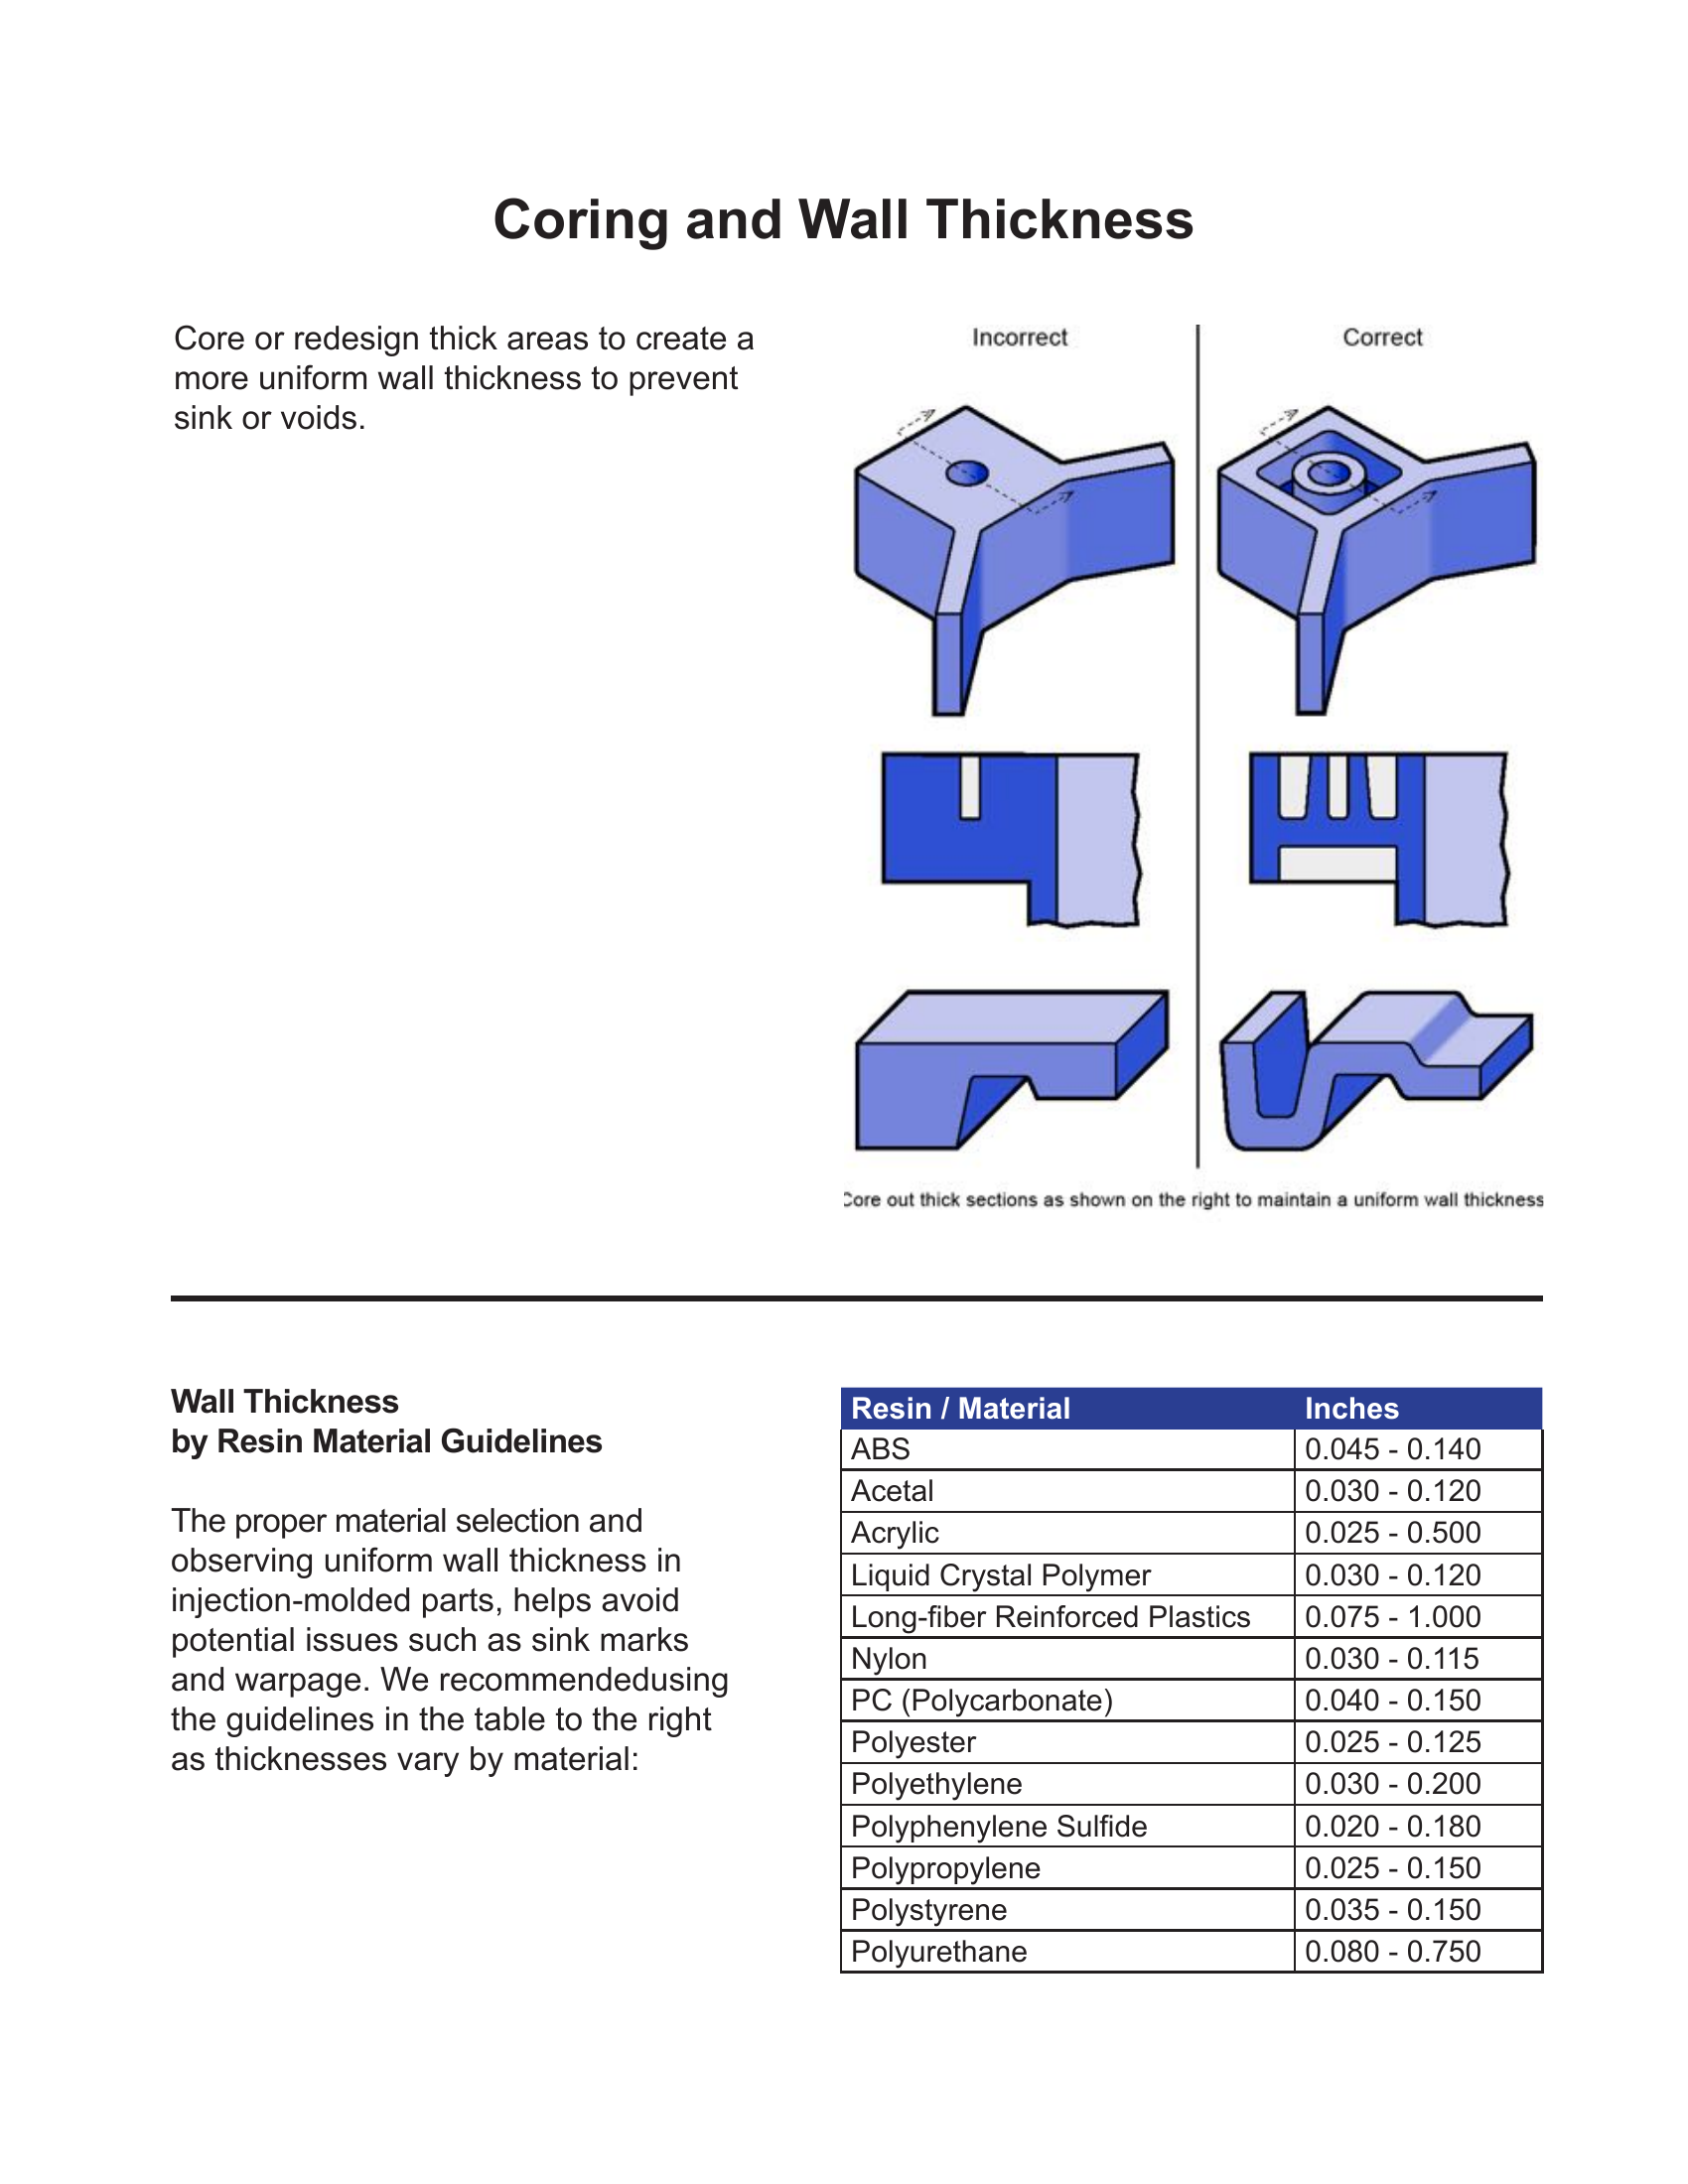

In [31]:
images[1]

In [7]:
import numpy as np

In [8]:
lp.is_detectron2_available()

True

In [9]:
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_101_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"},
        )

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


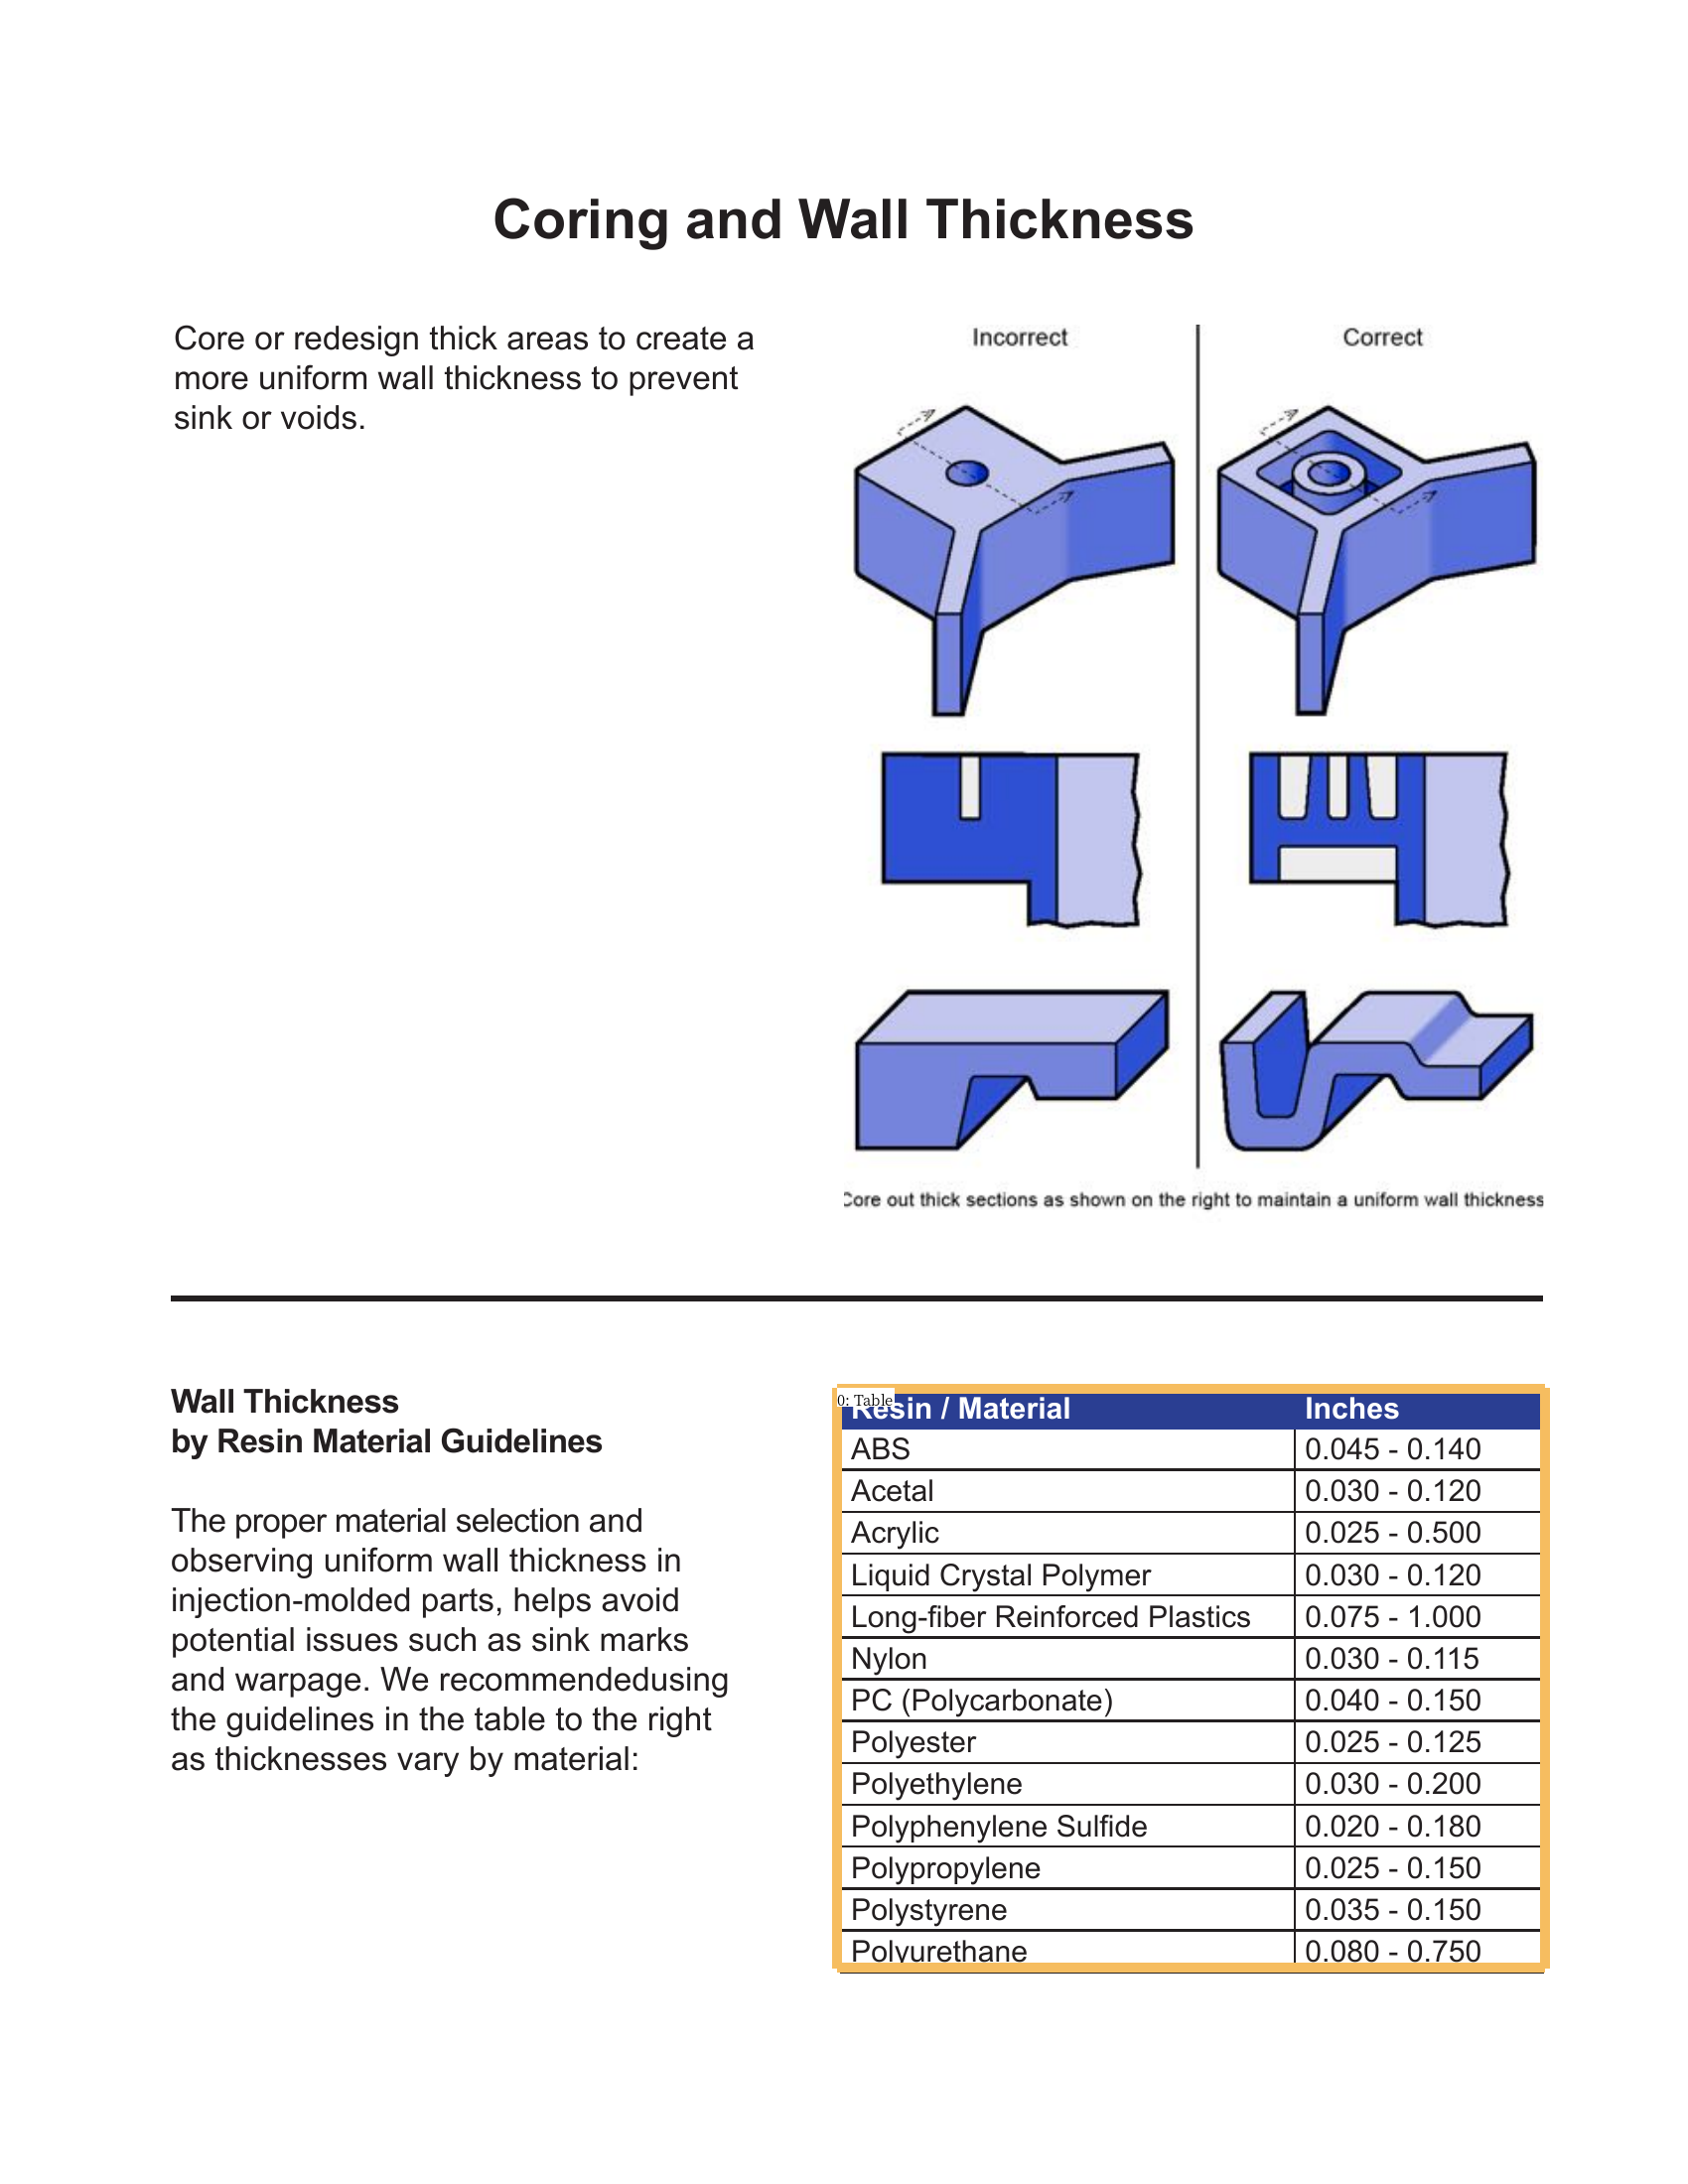

In [32]:
ocr_agent = ocr.TesseractAgent()
image = np.array(images[1])
layout = model.detect(image)
lp.draw_box(image, layout, box_width=10,  show_element_type=True, show_element_id=True)

In [33]:
type(layout)

layoutparser.elements.layout.Layout

In [34]:
table = lp.Layout([b for b in layout if b.type == 'Table'])
table

Layout(_blocks=[TextBlock(block=Rectangle(x_1=843.5719604492188, y_1=1398.9920654296875, x_2=1555.376953125, y_2=1982.711181640625), text=None, id=None, type=Table, parent=None, next=None, score=0.9850677251815796)], page_data={})

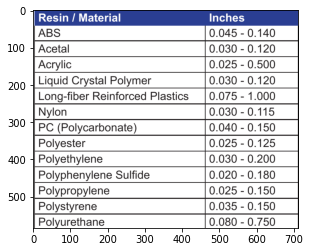

In [36]:
x_1 = table[0].block.x_1
x_2 = table[0].block.x_2
y_1 = table[0].block.y_1
y_2 = table[0].block.y_2
output = image[int(y_1):int(y_2), int(x_1):int(x_2)]
plt.imshow(output)
plt.savefig('table_4')